# House Price Prediction

## Steps are:
0. Loading Libraries
1. Load the data and understand the variables
2. Data Inspection
3. Data Cleaning
4. Outlier Treatment
5. Exploratory Data analysis
6. Data Visualization
7. Data Preparation
8. Train-Test Split
9. Scaling
10. Model Building using mlr and rfe
11. Model evaluation
12. Tuning with Regularization (Ridge & Lasso)
13. Model Evaluation after Ridge and lasso
14. Analysis
15. Conclusion

# 0. IMPORTING LIRARIES

In [1]:
# importing libraries
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

import sklearn


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Load the data and understand the variables

In [2]:
# reading the dataset
data = pd.read_csv("train.csv", encoding = 'utf-8')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the dimensions
data.shape

(1460, 81)

In [4]:
# Check for column details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# To get the description of the dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2. Data Inspection

In [6]:
#checking duplicates
sum(data.duplicated(subset = 'Id')) == 0

True

In [7]:
# Checking for percentage nulls
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
# check for null values in all categorical columns

data.select_dtypes(include='object').isnull().sum()[data.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
#Checking for outlier in the numerical columns
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

# 3. Data Cleaning

In [10]:
data.isnull().sum()[(data.isnull().sum()>0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
round(100*data.isnull().sum()[(data.isnull().sum()>0)]/len(data), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

#### Cleaning the columns where null value percentage greater than 85% Alley,PoolQC,MiscFeature
- 1. according to the data dictonary Alley - NA = No alley access and it has around 94% 
    so it can be considered as a single value and dropped
- 2. PoolQC column NA = No pool. Since it has  99.52% NA values, we can considered it as single value and hence dropped.
- 3. MiscFeature is having 96.30% null values , hence we will consider it as single value and it can be removed.

In [12]:
data["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [13]:
data["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [14]:
data["MiscFeature"].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [15]:
data.drop(["Alley", "PoolQC", "MiscFeature"], axis=1, inplace=True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


### Drop the columns which represnets the 90% same values.

In [16]:
columns = []   
for col in (data):
    if(data[col].value_counts().max() >= data.shape[0]*0.9):
        columns.append(col)

columns

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [17]:
# Remove the columns with skewed data

data.drop(columns, axis = 1, inplace = True)

data.shape

(1460, 60)

In [18]:

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,192,84,0,NaN,12,2008,WD,Normal,250000


- as these columns has maximum value percentage has 90% we can see some skewness in the data if it is there in the dataset. Hence those can be dropped.
- We can also drop ID column - as there is no use of that column

In [19]:
data.drop("Id", axis = 1, inplace = True)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,TA,0,61,0,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,TA,298,0,0,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,TA,0,42,0,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,TA,0,35,272,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,TA,192,84,0,NaN,12,2008,WD,Normal,250000


#### Checking the null value percentage after removing some of the columns

In [20]:
round(100*data.isnull().sum()[(data.isnull().sum()>0)]/len(data), 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
Fence           80.75
dtype: float64

# 4. Outlier Treatment

In [21]:
data.shape

(1460, 59)

In [22]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,2.866438,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.815778,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,2158.300000,1.000000,2.000000,1.000000,4.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,10.000000,2010.000000,278000.000000
95%,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,2466.100000,1.000000,2.000000,1.000000,4.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,11.000000,2010.000000,326100.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,3123.480000,2.000000,3.000000,1.000000,5.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,12.000000,2010.000000,442567.010000


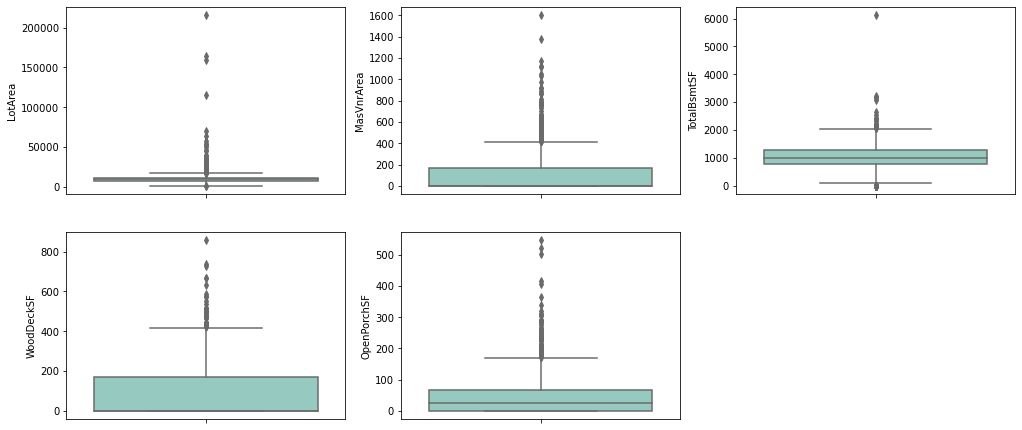

In [23]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = data)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = data)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = data)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = data)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = data)
plt.show()

In [24]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [25]:
data = remove_outliers(data,'LotArea')
data = remove_outliers(data,'MasVnrArea')
data = remove_outliers(data,'TotalBsmtSF')
data = remove_outliers(data,'WoodDeckSF')
data = remove_outliers(data,'OpenPorchSF')


In [26]:
# Determine the percentage of data retained after removing the outliers
num_data = round(100*(len(data)/1460),2)
print(num_data)

77.95


In [27]:
data.shape

(1138, 59)

# 5. Exploratory data analysis

In [28]:
# impute the value to fence columns
data["Fence"] = data["Fence"].astype('str')
data["Fence"] = data["Fence"].str.replace("nan", "No Fence")

print(data["Fence"].describe())
print(data["Fence"].value_counts())

count         1138
unique           5
top       No Fence
freq           902
Name: Fence, dtype: object
No Fence    902
MnPrv       132
GdWo         48
GdPrv        46
MnWw         10
Name: Fence, dtype: int64


In [29]:
# impute the value to nullable rows for GarageFinish
data["GarageFinish"] = data["GarageFinish"].fillna("No Garage")

In [30]:
# imputing vaules to LotFrontage
print(data["LotFrontage"].describe())
print(data["LotFrontage"].value_counts())
data["LotFrontage"] = data["LotFrontage"].replace(np.nan, data["LotFrontage"].median())

count    949.000000
mean      67.528978
std       20.039003
min       21.000000
25%       58.000000
50%       67.000000
75%       80.000000
max      182.000000
Name: LotFrontage, dtype: float64
60.0     121
70.0      65
80.0      57
50.0      50
75.0      37
65.0      36
85.0      31
78.0      23
21.0      20
68.0      17
73.0      16
90.0      15
51.0      15
24.0      15
64.0      15
79.0      14
72.0      14
63.0      14
74.0      13
55.0      13
52.0      12
43.0      12
66.0      12
40.0      11
59.0      11
76.0      11
71.0      10
53.0      10
88.0      10
67.0      10
92.0       9
57.0       9
69.0       9
82.0       8
100.0      8
84.0       8
34.0       8
77.0       7
35.0       7
61.0       7
58.0       7
62.0       7
86.0       7
96.0       6
36.0       6
44.0       6
54.0       6
41.0       6
93.0       5
37.0       5
120.0      5
98.0       5
81.0       5
89.0       4
48.0       4
83.0       4
91.0       4
94.0       3
32.0       3
56.0       3
105.0      3
45.0       3


<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

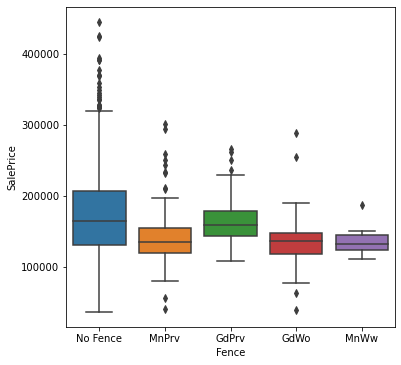

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = data)

 80% of the data does not contain fence 

#### Analyzing Garage related columns

In [32]:
#GarageType, GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
data["GarageYrBlt"] = data["GarageYrBlt"].fillna(0)

In [33]:
data["GarageType"] = data["GarageType"].astype('str')
data["GarageType"] = data["GarageType"].str.replace("nan", "No Garage")


In [34]:

data["GarageType"].describe()


count       1138
unique         7
top       Attchd
freq         663
Name: GarageType, dtype: object

In [35]:

data["GarageType"].value_counts()


Attchd       663
Detchd       320
No Garage     66
BuiltIn       62
Basment       17
CarPort        6
2Types         4
Name: GarageType, dtype: int64

In [36]:

data['GarageType'].value_counts()/len(data['GarageType'])*100

Attchd       58.260105
Detchd       28.119508
No Garage     5.799649
BuiltIn       5.448155
Basment       1.493849
CarPort       0.527241
2Types        0.351494
Name: GarageType, dtype: float64

In [37]:
data['GarageYrBlt'].value_counts()/len(data['GarageYrBlt'])*100

0.0       5.799649
2005.0    4.833040
2004.0    4.042179
2006.0    3.778559
2003.0    3.075571
2007.0    2.811951
1977.0    2.284710
1976.0    2.108963
2000.0    2.021090
1999.0    1.933216
2008.0    1.845343
1950.0    1.757469
2002.0    1.757469
1998.0    1.757469
1968.0    1.669596
1993.0    1.581722
1958.0    1.581722
1962.0    1.581722
1974.0    1.493849
1978.0    1.493849
1966.0    1.493849
1964.0    1.405975
1965.0    1.405975
1957.0    1.405975
1996.0    1.318102
2001.0    1.318102
1970.0    1.318102
1980.0    1.230228
1954.0    1.230228
1959.0    1.230228
1960.0    1.230228
1997.0    1.142355
1990.0    1.142355
1956.0    1.142355
1920.0    1.142355
1969.0    1.142355
1940.0    1.054482
1963.0    1.054482
1972.0    1.054482
1961.0    0.966608
1988.0    0.966608
1971.0    0.966608
2009.0    0.966608
1953.0    0.966608
1994.0    0.966608
1995.0    0.966608
1967.0    0.878735
1941.0    0.878735
1973.0    0.790861
1939.0    0.790861
1989.0    0.790861
1948.0    0.790861
1985.0    0.

In [38]:
data['GarageQual'].value_counts()


TA    1013
Fa      45
Gd       9
Po       3
Ex       2
Name: GarageQual, dtype: int64

In [39]:
data['GarageQual'].describe()


count     1072
unique       5
top         TA
freq      1013
Name: GarageQual, dtype: object

In [40]:
data["GarageQual"] = data["GarageQual"].str.replace("nan", "No Garage")


In [41]:
data['GarageQual'].value_counts()/len(data['GarageQual'])*100

TA    89.015817
Fa     3.954306
Gd     0.790861
Po     0.263620
Ex     0.175747
Name: GarageQual, dtype: float64

##### its 90% of TA value in GargeQual so we can drop that column

In [42]:
data["GarageFinish"].value_counts()


Unf          503
RFn          331
Fin          238
No Garage     66
Name: GarageFinish, dtype: int64

In [43]:
data['GarageFinish'].value_counts()/len(data['GarageFinish'])*100

Unf          44.200351
RFn          29.086116
Fin          20.913884
No Garage     5.799649
Name: GarageFinish, dtype: float64

#### plotting Garage related columns with the target variable Sales price

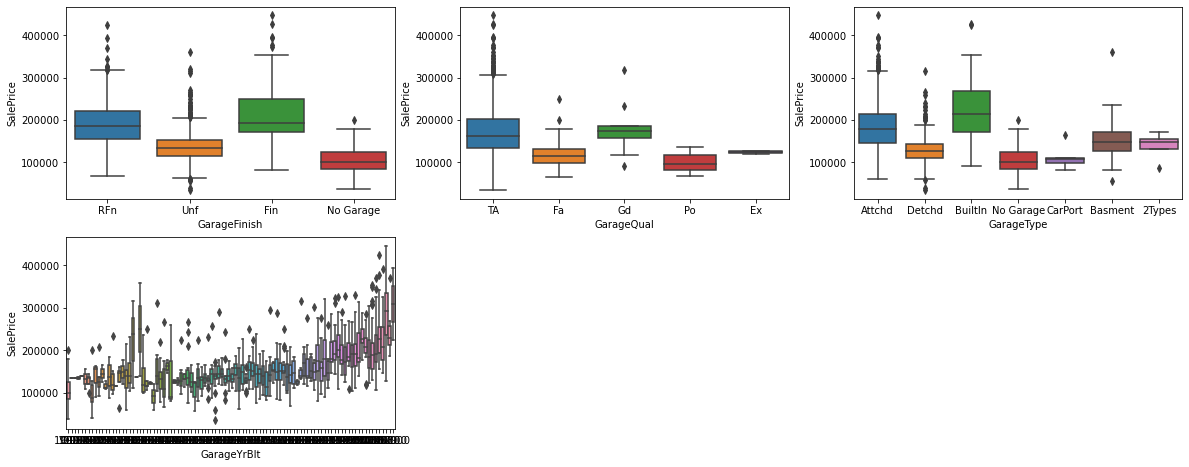

In [44]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageType',y = 'SalePrice', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageYrBlt',y = 'SalePrice', data = data)
plt.show()

- from the plots plotted above and value_caounts calculation GarageQual, MasVnrArea are less influence varibles. So we can drop them

In [45]:
data.drop("GarageQual", axis=1, inplace=True)
data.shape

(1138, 58)

In [46]:
data.drop("MasVnrArea", axis=1, inplace=True)
data.shape

(1138, 57)

#### Analyzing  Basement related columns

In [47]:
data["BsmtQual"] = data["BsmtQual"].fillna("None")
data["BsmtQual"].value_counts()
data["BsmtQual"].value_counts()/len(data)*100

TA    48.945518
Gd    42.970123
Ex     5.184534
Fa     2.899824
Name: BsmtQual, dtype: float64

In [48]:
data["BsmtCond"] = data["BsmtCond"].fillna("None")
data["BsmtCond"].value_counts()
data["BsmtCond"].value_counts()/len(data)*100

TA    91.827768
Gd     4.481547
Fa     3.514938
Po     0.175747
Name: BsmtCond, dtype: float64

In [49]:
data["BsmtExposure"] = data["BsmtExposure"].fillna("None")
data["BsmtExposure"].value_counts()
data["BsmtExposure"].value_counts()/len(data)*100

No      69.683656
Av      15.817223
Mn       7.644991
Gd       6.766257
None     0.087873
Name: BsmtExposure, dtype: float64

In [50]:
data["BsmtFinType1"] = data["BsmtFinType1"].fillna("None")
data["BsmtFinType1"].value_counts()
data["BsmtFinType1"].value_counts()/len(data)*100

Unf    31.370826
GLQ    26.625659
ALQ    15.729350
BLQ    10.896309
Rec     9.841828
LwQ     5.536028
Name: BsmtFinType1, dtype: float64

In [51]:
data["BsmtFinType2"] = data["BsmtFinType2"].fillna("None")
data["BsmtFinType2"].value_counts()
data["BsmtFinType2"].value_counts()/len(data)*100

Unf    88.927944
LwQ     3.427065
Rec     3.427065
BLQ     2.284710
ALQ     1.054482
GLQ     0.878735
Name: BsmtFinType2, dtype: float64

In [52]:
# basement columns:
basement = data[["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1", "BsmtFinType2","BsmtFinSF1", "BsmtFinSF2",
                         "BsmtUnfSF","TotalBsmtSF"]]
basement

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,Gd,TA,No,GLQ,Unf,706,0,150,856
1,Gd,TA,Gd,ALQ,Unf,978,0,284,1262
2,Gd,TA,Mn,GLQ,Unf,486,0,434,920
3,TA,Gd,No,ALQ,Unf,216,0,540,756
4,Gd,TA,Av,GLQ,Unf,655,0,490,1145
...,...,...,...,...,...,...,...,...,...
1454,Gd,TA,No,GLQ,Unf,410,0,811,1221
1455,Gd,TA,No,Unf,Unf,0,0,953,953
1456,Gd,TA,No,ALQ,Rec,790,163,589,1542
1457,TA,Gd,No,GLQ,Unf,275,0,877,1152


<Figure size 1440x864 with 0 Axes>

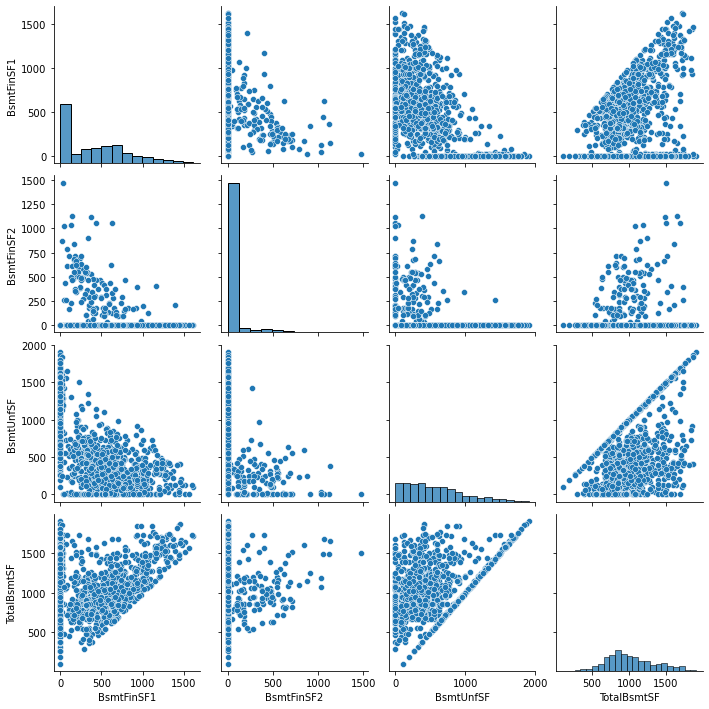

In [53]:
#plot a pair plot for basement related columns
plt.figure(figsize=(20, 12))
sns.pairplot(basement)
plt.show()

##### From the plot we can observe that the we can drop "BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF"

- plotting the box plots remainig basement related colums to see the effect of those features with the target varibale Sales priice

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

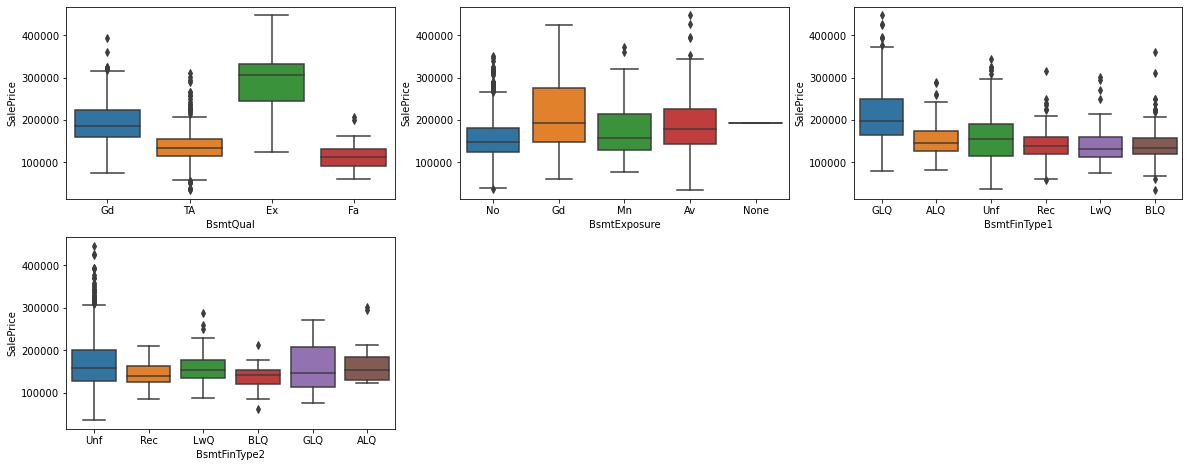

In [54]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = data)

##### We can drop BsmtFinType2, BsmtFinType1, BsmtExposure as they dont havemuch influence on sales price.
- dropping some of the basement related columns as they dont show much influence with the target variable

In [55]:
#drop the columns
basementcolList = ["BsmtFinSF1", "BsmtFinSF2","BsmtUnfSF","BsmtFinType2", "BsmtFinType1", "BsmtExposure" ]
data.drop(basementcolList, axis=1, inplace=True)
#cheking the shape of the house price data set after dropping basement variables
data.shape

(1138, 51)

In [56]:
# checking for the remaining null values in the dataset
round(100*data.isnull().sum()[(data.isnull().sum()>0)]/len(data), 2)

FireplaceQu    52.2
dtype: float64

# Fireplace column

In [57]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("No Fireplace")
data["FireplaceQu"].head(20)

0     No Fireplace
1               TA
2               TA
3               Gd
4               TA
5     No Fireplace
6               Gd
8               TA
9               TA
10    No Fireplace
11              Gd
12    No Fireplace
13              Gd
15    No Fireplace
16              TA
18    No Fireplace
19    No Fireplace
20              Gd
21              Gd
23              TA
Name: FireplaceQu, dtype: object

#### MasVnrType column imputing and analyzing

In [58]:
data['MasVnrType'] = data['MasVnrType'].fillna("None")
data['MasVnrType'].value_counts()/len(data['MasVnrType'])*100

None       62.741652
BrkFace    28.295255
Stone       8.084359
BrkCmn      0.878735
Name: MasVnrType, dtype: float64

In [59]:
round(100*data.isnull().sum()[(data.isnull().sum()>0)]/len(data), 2)

Series([], dtype: float64)

#### Now there is no empty columns and rows

In [60]:
data.shape

(1138, 51)

In [61]:
#Correlation map to see how features are correlated with SalePrice
corr = data.corr()
print(corr)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.398850 -0.413568     0.098258    -0.057150   
LotFrontage     -0.398850     1.000000  0.573369     0.170344    -0.052029   
LotArea         -0.413568     0.573369  1.000000     0.164657    -0.042379   
OverallQual      0.098258     0.170344  0.164657     1.000000    -0.123133   
OverallCond     -0.057150    -0.052029 -0.042379    -0.123133     1.000000   
YearBuilt        0.041354     0.130482  0.081003     0.574394    -0.371761   
YearRemodAdd     0.055021     0.076619  0.055185     0.524694     0.057586   
TotalBsmtSF     -0.238976     0.267487  0.289006     0.425247    -0.241040   
1stFlrSF        -0.214051     0.314099  0.358528     0.394967    -0.161421   
2ndFlrSF         0.312599     0.043720  0.118946     0.304142    -0.001794   
GrLivArea        0.138336     0.267226  0.370380     0.562431    -0.118852   
BsmtFullBath     0.040234     0.017762  0.051513     0.047731   

<AxesSubplot:>

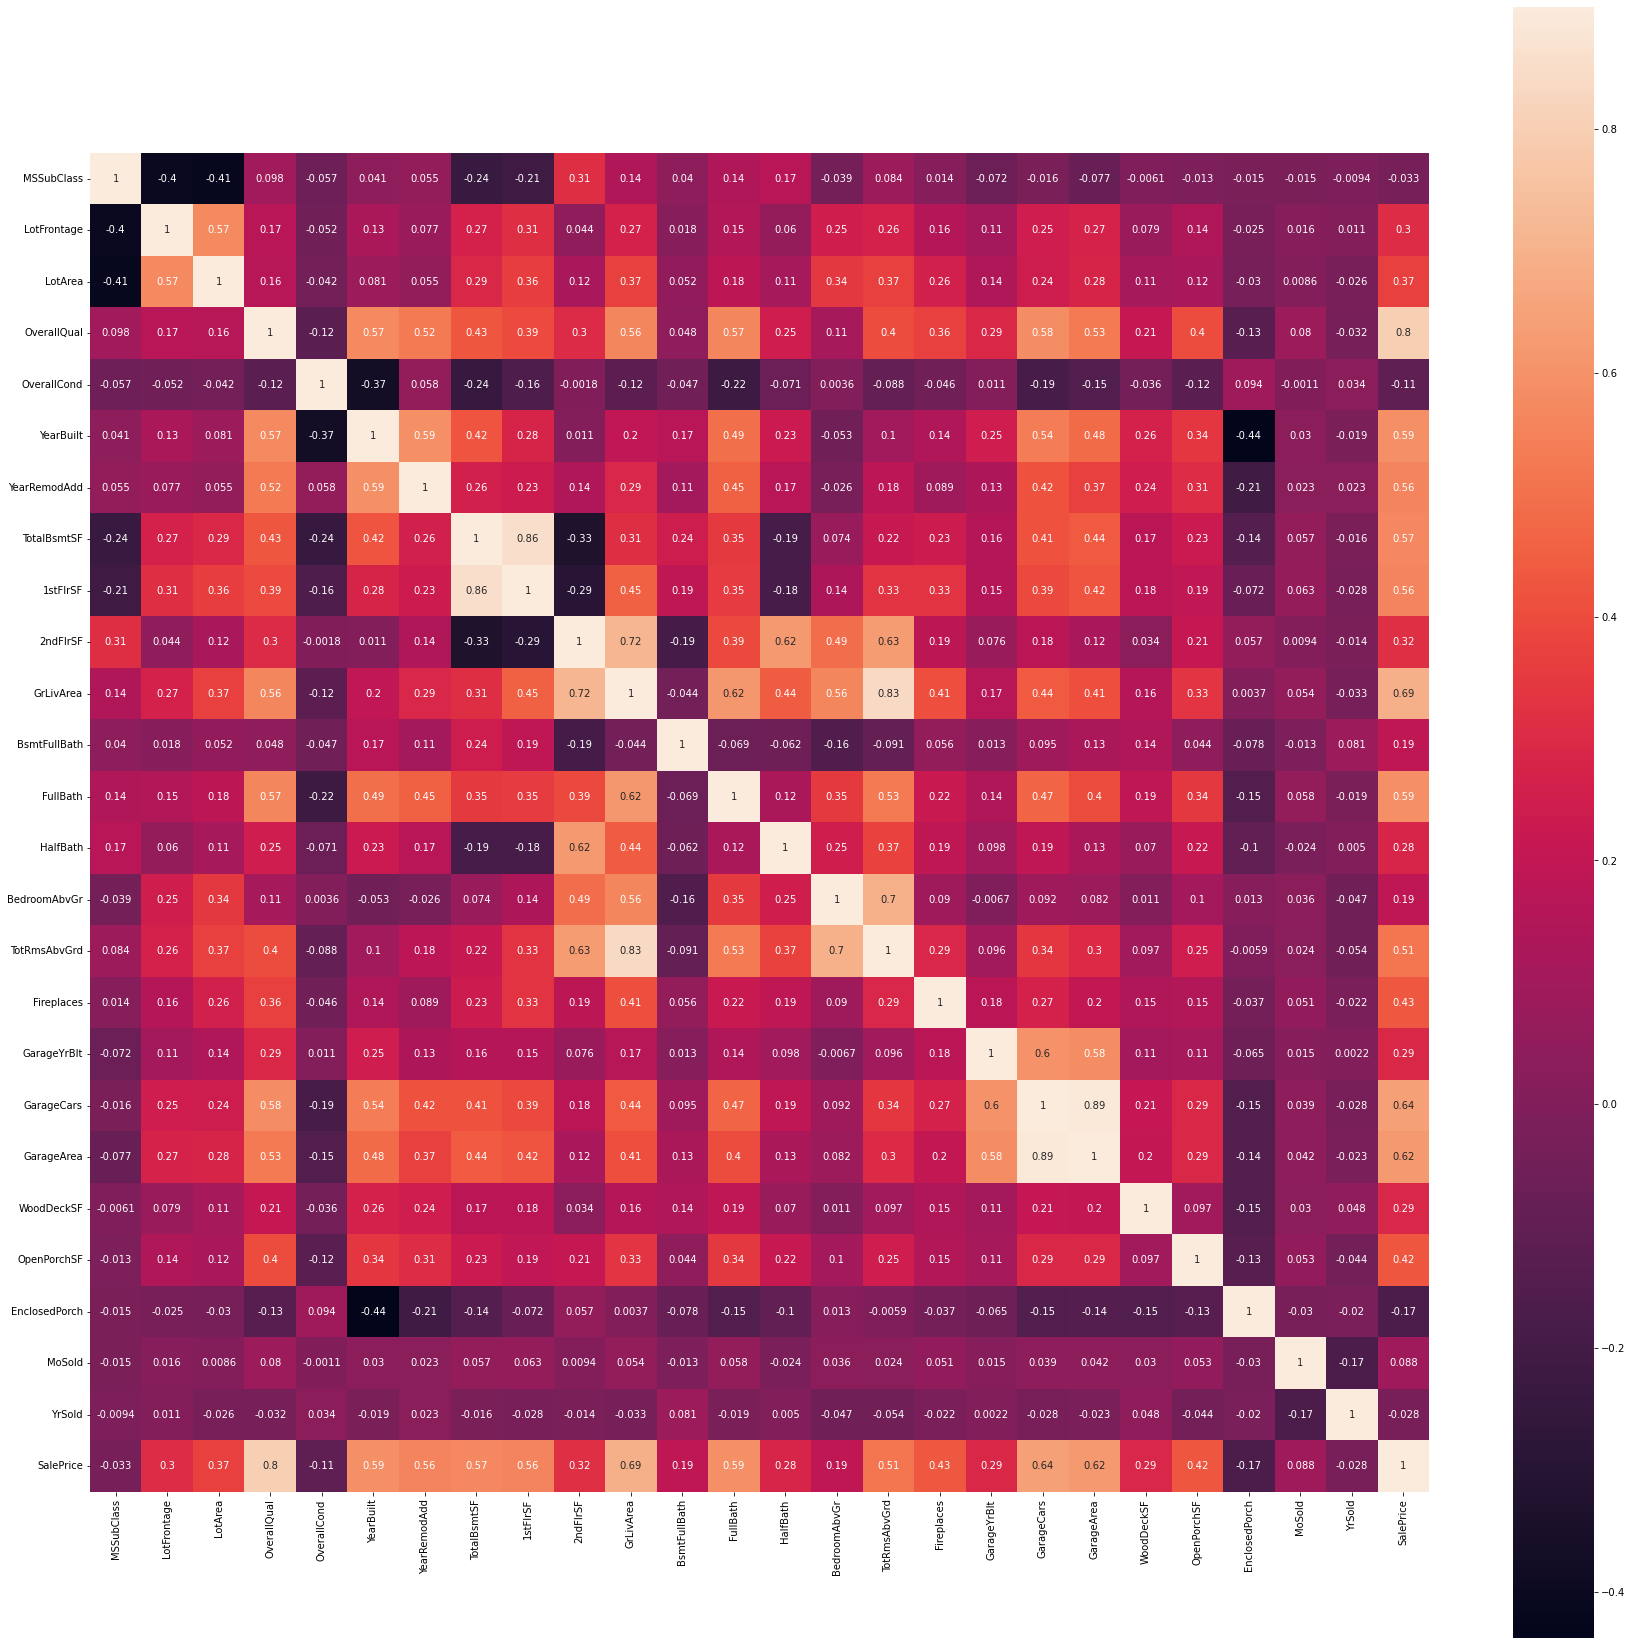

In [62]:
plt.subplots(figsize=(30,30))
sns.heatmap(corr, vmax=0.9, square=True, annot = True)

# 6. Data Visualization

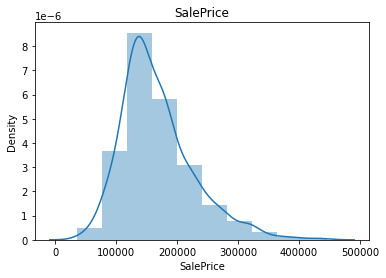

In [63]:
# Visualise the target variable -> SalePrice after transforming the sales price

# data['SalePrice'] = np.log1p(data['SalePrice'])

plt.title('SalePrice')
sns.distplot(data['SalePrice'], bins=10)
plt.show()

### Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [64]:
#Log Transformation
data['SalePrice']=np.log1p(data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

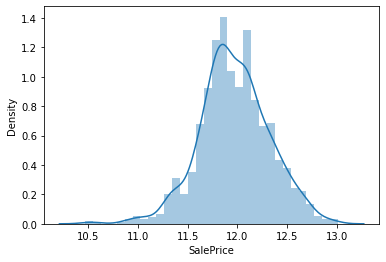

In [65]:
sns.distplot(data['SalePrice'])

In [66]:
# correlation matrix
cor = data.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.398850,-0.413568,0.098258,-0.057150,0.041354,0.055021,-0.238976,-0.214051,0.312599,0.138336,0.040234,0.142877,0.171451,-0.039003,0.084469,0.013866,-0.071713,-0.015686,-0.077111,-0.006135,-0.012826,-0.014625,-0.015322,-0.009418,-0.026411
LotFrontage,-0.398850,1.000000,0.573369,0.170344,-0.052029,0.130482,0.076619,0.267487,0.314099,0.043720,0.267226,0.017762,0.149413,0.059729,0.249385,0.263388,0.160508,0.106589,0.246578,0.270508,0.079497,0.138541,-0.025206,0.016086,0.010671,0.312485
LotArea,-0.413568,0.573369,1.000000,0.164657,-0.042379,0.081003,0.055185,0.289006,0.358528,0.118946,0.370380,0.051513,0.184357,0.114854,0.341119,0.368366,0.259156,0.141874,0.241407,0.276334,0.114433,0.118405,-0.030330,0.008587,-0.025599,0.372022
OverallQual,0.098258,0.170344,0.164657,1.000000,-0.123133,0.574394,0.524694,0.425247,0.394967,0.304142,0.562431,0.047731,0.565514,0.246430,0.114846,0.403059,0.364598,0.291548,0.581407,0.525268,0.210579,0.400303,-0.134381,0.080107,-0.032499,0.795420
OverallCond,-0.057150,-0.052029,-0.042379,-0.123133,1.000000,-0.371761,0.057586,-0.241040,-0.161421,-0.001794,-0.118852,-0.046526,-0.221325,-0.071342,0.003608,-0.088445,-0.046158,0.011189,-0.185754,-0.153249,-0.035627,-0.120475,0.093857,-0.001078,0.034117,-0.054807
YearBuilt,0.041354,0.130482,0.081003,0.574394,-0.371761,1.000000,0.589023,0.421454,0.278025,0.010969,0.195574,0.172131,0.494952,0.226758,-0.053088,0.099691,0.139827,0.246831,0.536493,0.484710,0.264252,0.338807,-0.437593,0.030047,-0.018756,0.616845
YearRemodAdd,0.055021,0.076619,0.055185,0.524694,0.057586,0.589023,1.000000,0.258622,0.231969,0.137705,0.288635,0.106592,0.452044,0.169174,-0.025544,0.180059,0.088578,0.132145,0.418418,0.366160,0.242714,0.305205,-0.209364,0.023268,0.023060,0.577743
TotalBsmtSF,-0.238976,0.267487,0.289006,0.425247,-0.241040,0.421454,0.258622,1.000000,0.856426,-0.330322,0.311051,0.240399,0.349081,-0.187554,0.073972,0.216917,0.232520,0.157316,0.414174,0.439197,0.173899,0.228245,-0.141700,0.057099,-0.015874,0.562823
1stFlrSF,-0.214051,0.314099,0.358528,0.394967,-0.161421,0.278025,0.231969,0.856426,1.000000,-0.292666,0.452005,0.194346,0.354851,-0.183818,0.136119,0.328638,0.328918,0.154365,0.390183,0.421309,0.177171,0.194952,-0.071931,0.063311,-0.028161,0.556676
2ndFlrSF,0.312599,0.043720,0.118946,0.304142,-0.001794,0.010969,0.137705,-0.330322,-0.292666,1.000000,0.715217,-0.194225,0.390691,0.621069,0.489393,0.632323,0.186645,0.076401,0.177950,0.117535,0.033503,0.211371,0.057053,0.009379,-0.014434,0.309406


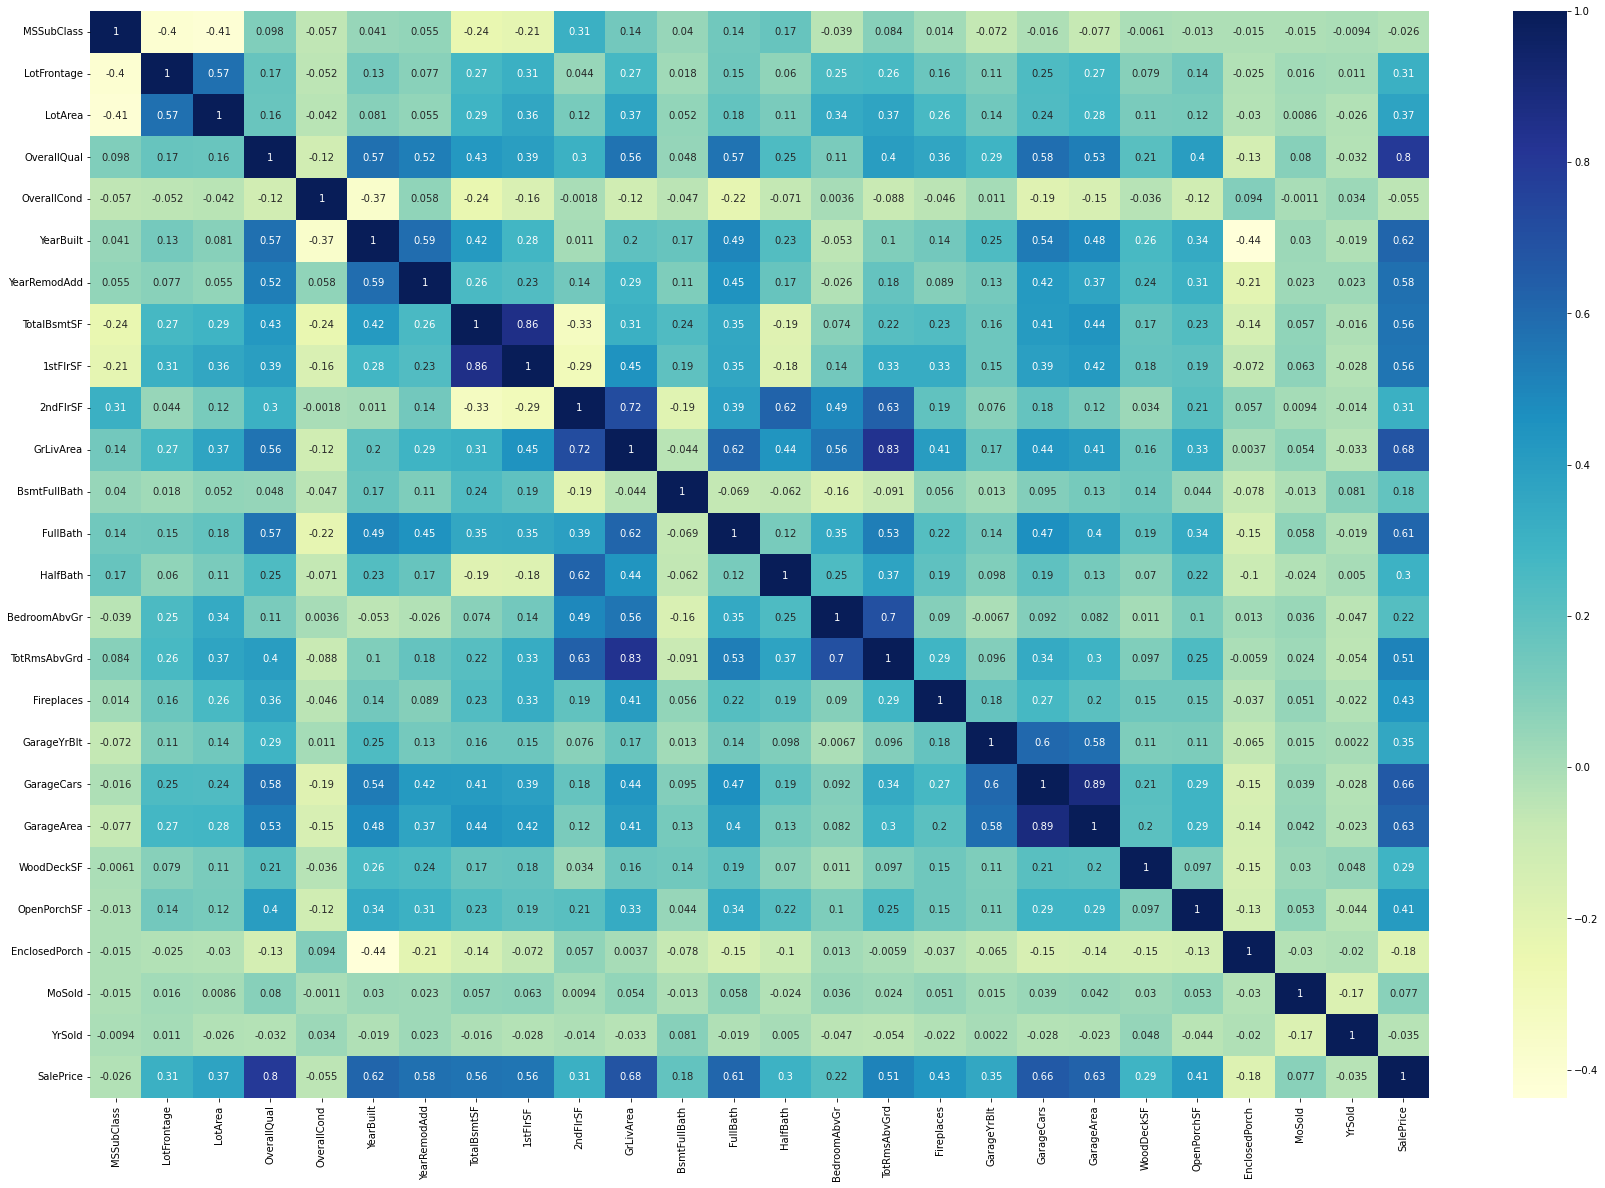

In [67]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### We can see that some of the variables are correlated

#### Before dropping these columns, we will first check their predictive power

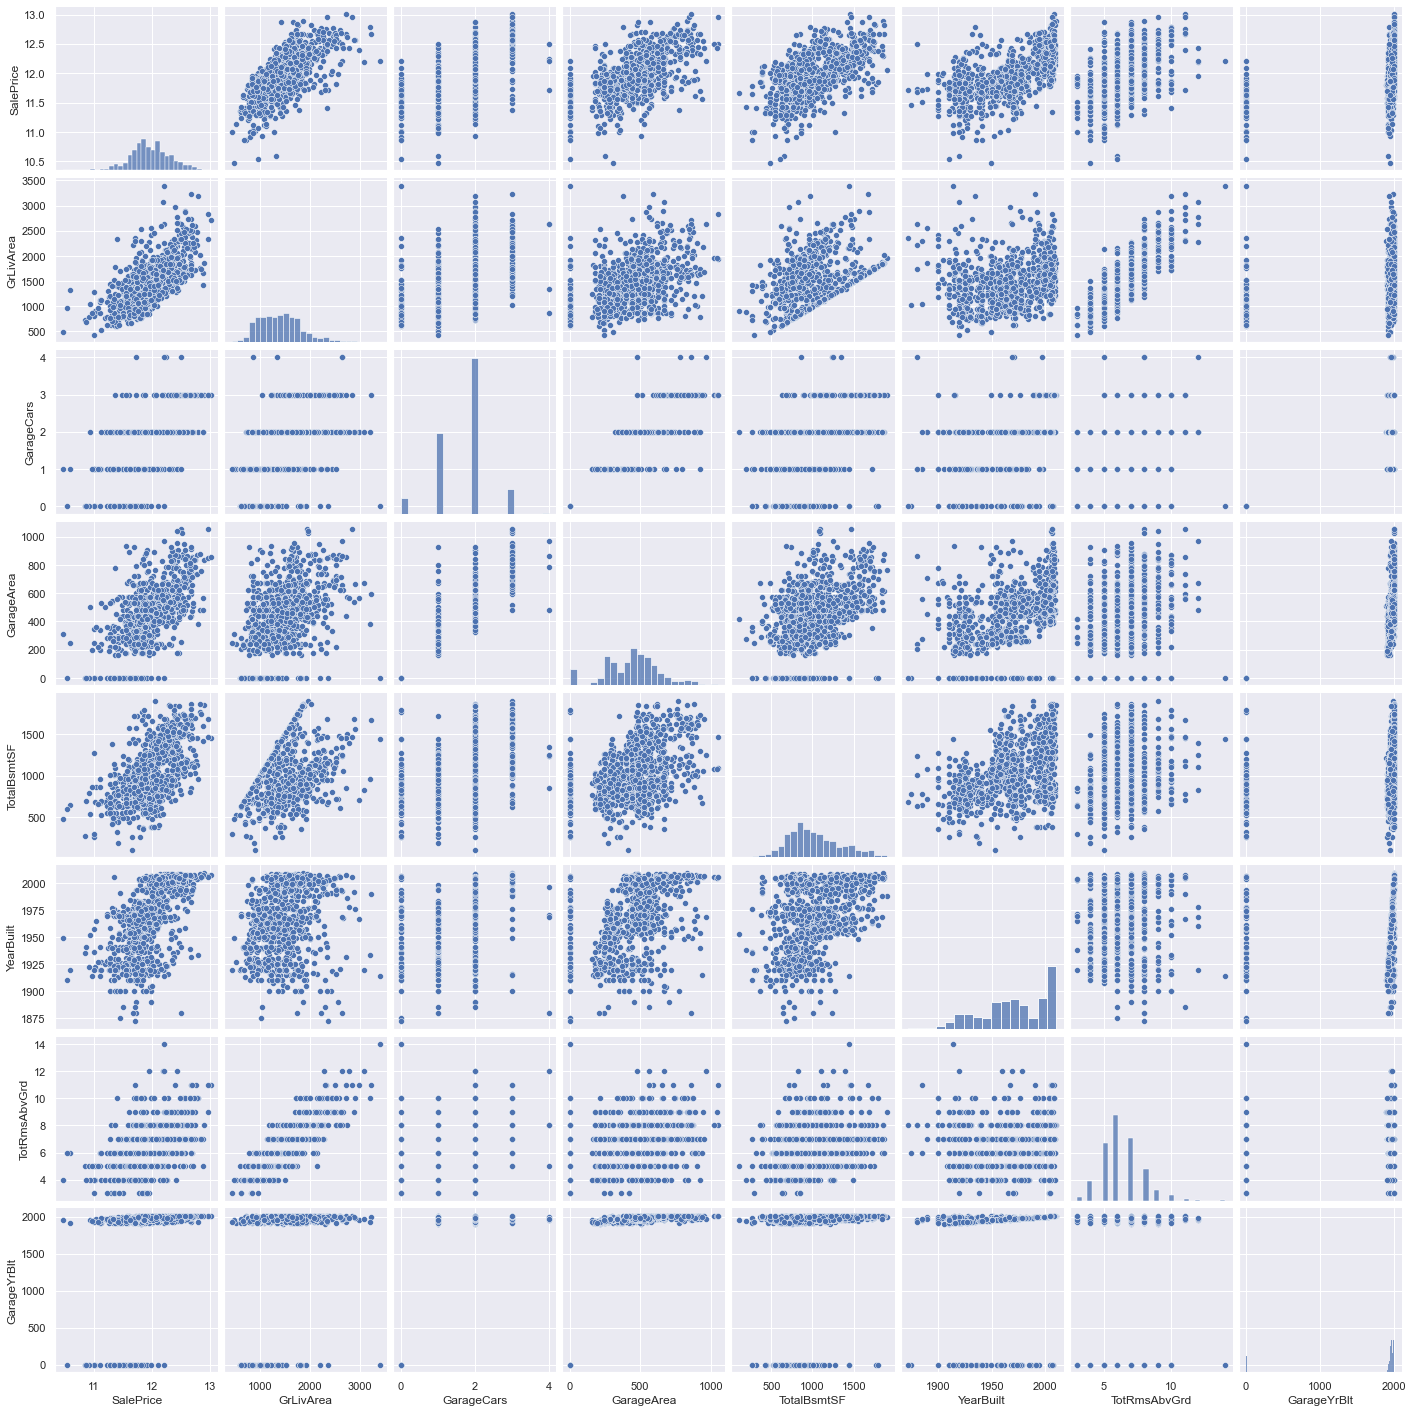

In [68]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(data[cols], size = 2.5)
plt.show()

### Drop columns that are correlated and not contributing to 'SalePrice'

In [69]:
data = data.drop(['TotRmsAbvGrd'], axis = 1)
data = data.drop(['GarageYrBlt'], axis = 1)    

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,856,Ex,856,854,1710,1,2,1,3,Gd,0,No Fireplace,Attchd,RFn,2,548,0,61,0,No Fence,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,460,298,0,0,No Fence,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,608,0,42,0,No Fence,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,642,0,35,272,No Fence,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,836,192,84,0,No Fence,12,2008,WD,Normal,12.429220


In [70]:
#Numeric columns
data.select_dtypes(exclude=['object'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,856,856,854,1710,1,2,1,3,0,2,548,0,61,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,1262,1262,0,1262,0,2,0,3,1,2,460,298,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,920,920,866,1786,1,2,1,3,1,2,608,0,42,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,756,961,756,1717,1,1,0,3,1,3,642,0,35,272,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,1145,1145,1053,2198,1,2,1,4,1,3,836,192,84,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,2004,2005,1221,1221,0,1221,1,2,0,2,0,2,400,0,113,0,10,2009,12.128117
1455,60,62.0,7917,6,5,1999,2000,953,953,694,1647,0,2,1,3,1,2,460,0,40,0,8,2007,12.072547
1456,20,85.0,13175,6,6,1978,1988,1542,2073,0,2073,1,2,0,3,2,2,500,349,0,0,2,2010,12.254868
1457,70,66.0,9042,7,9,1941,2006,1152,1188,1152,2340,0,2,0,4,2,1,252,0,60,0,5,2010,12.493133


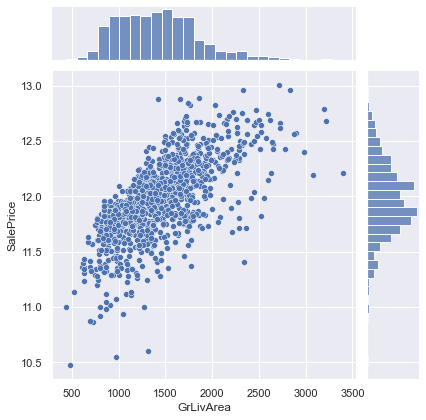

In [71]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=data)
plt.show()

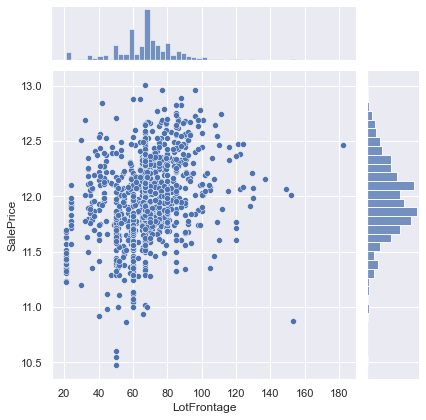

In [72]:
# Lot frontage vs SalePrice 
sns.jointplot(x = data['LotFrontage'], y = data['SalePrice'])
plt.show()

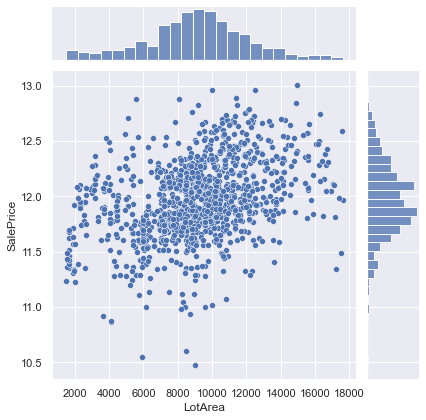

In [73]:
# LotArea vs SalePrice
sns.jointplot(x = data['LotArea'], y = data['SalePrice'])
plt.show()

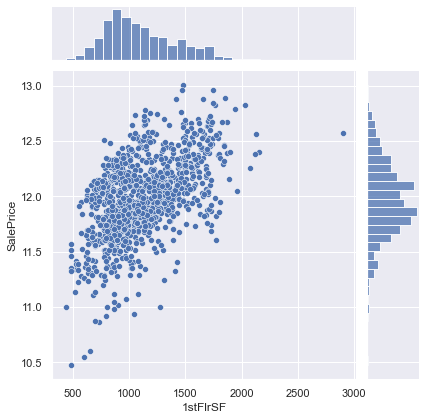

In [74]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = data['1stFlrSF'], y = data['SalePrice'])
plt.show()

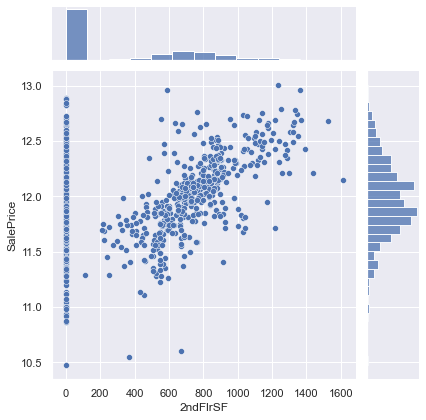

In [75]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = data['2ndFlrSF'], y = data['SalePrice'])
plt.show()

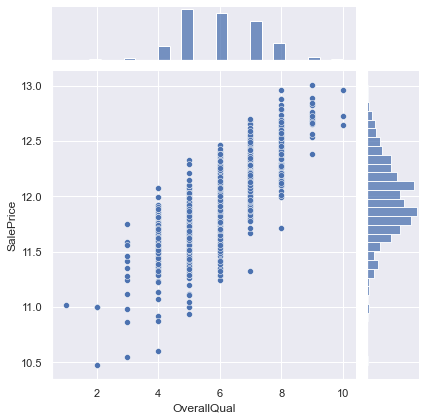

In [76]:
# OverallQual vs SalePrice
sns.jointplot(x = data['OverallQual'], y = data['SalePrice'])
plt.show()

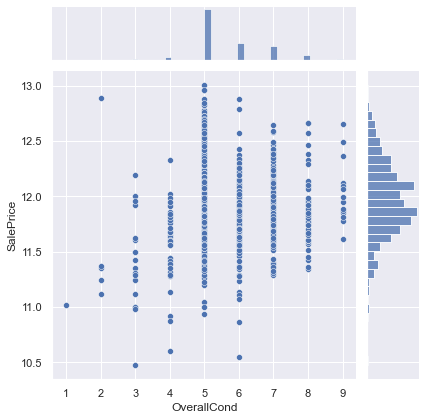

In [77]:
# OverallCond vs SalePrice
sns.jointplot(x=data['OverallCond'], y = data['SalePrice'])
plt.show()

#### Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase

### newly derived columns

### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

In [78]:
# PropAge -  Property Age from yearsold - yearbuilt
data['PropAge'] = (data['YrSold'] - data['YearBuilt'])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,856,Ex,856,854,1710,1,2,1,3,Gd,0,No Fireplace,Attchd,RFn,2,548,0,61,0,No Fence,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,460,298,0,0,No Fence,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,608,0,42,0,No Fence,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,642,0,35,272,No Fence,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,836,192,84,0,No Fence,12,2008,WD,Normal,12.429220,8


In [79]:
# Create a new column named IsRemodelled - This column can determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
data['IsRemodelled'] = data.apply(checkRemodel, axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge,IsRemodelled
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,856,Ex,856,854,1710,1,2,1,3,Gd,0,No Fireplace,Attchd,RFn,2,548,0,61,0,No Fence,2,2008,WD,Normal,12.247699,5,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,460,298,0,0,No Fence,5,2007,WD,Normal,12.109016,31,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,608,0,42,0,No Fence,9,2008,WD,Normal,12.317171,7,1
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,642,0,35,272,No Fence,2,2006,WD,Abnorml,11.849405,91,1
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,836,192,84,0,No Fence,12,2008,WD,Normal,12.429220,8,0


In [80]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def funBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
data['BuiltOrRemodelAge'] = data.apply(funBuiltOrRemodelAge, axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge,IsRemodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,856,Ex,856,854,1710,1,2,1,3,Gd,0,No Fireplace,Attchd,RFn,2,548,0,61,0,No Fence,2,2008,WD,Normal,12.247699,5,0,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,460,298,0,0,No Fence,5,2007,WD,Normal,12.109016,31,0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,608,0,42,0,No Fence,9,2008,WD,Normal,12.317171,7,1,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,642,0,35,272,No Fence,2,2006,WD,Abnorml,11.849405,91,1,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,836,192,84,0,No Fence,12,2008,WD,Normal,12.429220,8,0,8


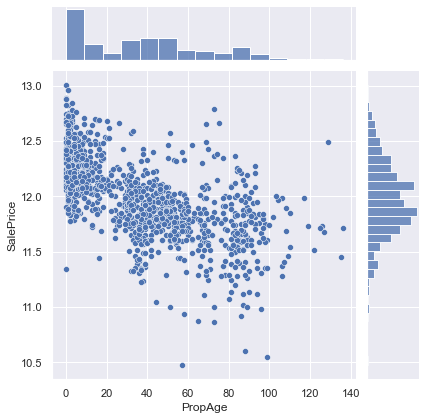

In [81]:
# PropAge vs SalePrice
sns.jointplot(x = data['PropAge'], y = data['SalePrice'])
plt.show()

#### Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

###  Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further 

In [82]:
data = data.drop(['MoSold'], axis = 1)
data = data.drop(['YrSold'], axis = 1)
data = data.drop(['YearBuilt'], axis = 1)
data = data.drop(['YearRemodAdd'], axis = 1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,SaleType,SaleCondition,SalePrice,PropAge,IsRemodelled,BuiltOrRemodelAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,856,Ex,856,854,1710,1,2,1,3,Gd,0,No Fireplace,Attchd,RFn,2,548,0,61,0,No Fence,WD,Normal,12.247699,5,0,5
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,1262,Ex,1262,0,1262,0,2,0,3,TA,1,TA,Attchd,RFn,2,460,298,0,0,No Fence,WD,Normal,12.109016,31,0,31
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,920,Ex,920,866,1786,1,2,1,3,Gd,1,TA,Attchd,RFn,2,608,0,42,0,No Fence,WD,Normal,12.317171,7,1,6
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,756,Gd,961,756,1717,1,1,0,3,Gd,1,Gd,Detchd,Unf,3,642,0,35,272,No Fence,WD,Abnorml,11.849405,91,1,36
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,1145,Ex,1145,1053,2198,1,2,1,4,Gd,1,TA,Attchd,RFn,3,836,192,84,0,No Fence,WD,Normal,12.429220,8,0,8


In [83]:
data.shape

(1138, 48)

### Just to check the variance of these columns 

In [84]:

# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
l2= data.select_dtypes(include=['float64', 'int64'])
l2


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,PropAge,IsRemodelled,BuiltOrRemodelAge
0,60,65.0,8450,7,5,856,856,854,1710,1,2,1,3,0,2,548,0,61,0,12.247699,5,0,5
1,20,80.0,9600,6,8,1262,1262,0,1262,0,2,0,3,1,2,460,298,0,0,12.109016,31,0,31
2,60,68.0,11250,7,5,920,920,866,1786,1,2,1,3,1,2,608,0,42,0,12.317171,7,1,6
3,70,60.0,9550,7,5,756,961,756,1717,1,1,0,3,1,3,642,0,35,272,11.849405,91,1,36
4,60,84.0,14260,8,5,1145,1145,1053,2198,1,2,1,4,1,3,836,192,84,0,12.429220,8,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,62.0,7500,7,5,1221,1221,0,1221,1,2,0,2,0,2,400,0,113,0,12.128117,5,1,4
1455,60,62.0,7917,6,5,953,953,694,1647,0,2,1,3,1,2,460,0,40,0,12.072547,8,1,7
1456,20,85.0,13175,6,6,1542,2073,0,2073,1,2,0,3,2,2,500,349,0,0,12.254868,32,1,22
1457,70,66.0,9042,7,9,1152,1188,1152,2340,0,2,0,4,2,1,252,0,60,0,12.493133,69,1,4


In [85]:
data[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head()

,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,Gd,Gd,TA,Ex,Gd,RFn,TA,Reg
1,TA,Gd,TA,Ex,TA,RFn,TA,Reg
2,Gd,Gd,TA,Ex,Gd,RFn,TA,IR1
3,TA,TA,Gd,Gd,Gd,Unf,TA,IR1
4,Gd,Gd,TA,Ex,Gd,RFn,TA,IR1


# 10. Data Preparation

In [86]:
data['ExterQual'] = data['ExterQual'].astype('category')
data['BsmtQual'] = data['BsmtQual'].astype('category')
data['BsmtCond'] = data['BsmtCond'].astype('category')
data['HeatingQC'] = data['HeatingQC'].astype('category')
data['KitchenQual'] = data['KitchenQual'].astype('category')
data['GarageFinish'] = data['GarageFinish'].astype('category')
#houseDF['GarageQual'] = houseDF['GarageQual'].astype('category')
data['ExterCond'] = data['ExterCond'].astype('category')
data['LotShape'] = data['LotShape'].astype('category')
data['Neighborhood'] = data['Neighborhood'].astype('category')

In [87]:
data['ExterQual'] = data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['BsmtQual'] = data.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtCond'] = data.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['HeatingQC'] = data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['KitchenQual'] = data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
data['GarageFinish'] = data.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
#houseDF['GarageQual'] = houseDF.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['ExterCond'] = data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['LotShape'] = data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
data['Fence'] = data['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0 })


In [88]:
#columns change to numerical
data[['ExterQual','BsmtQual','BsmtCond',
            'HeatingQC',  'KitchenQual','GarageFinish',
             'ExterCond','LotShape']].head() #,'GarageQual',


,ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageFinish,ExterCond,LotShape
0,3,4,3,4,3,2,2,3
1,2,4,3,4,2,2,2,3
2,3,4,3,4,3,2,2,0
3,2,3,4,3,3,1,2,0
4,3,4,3,4,3,2,2,0


In [89]:
# categorical columns
data[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Neighborhood',
            'GarageType','SaleType','SaleCondition']].head()

,MSZoning,LandContour,LotConfig,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,Neighborhood,GarageType,SaleType,SaleCondition
0,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
1,RL,Lvl,FR2,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Veenker,Attchd,WD,Normal
2,RL,Lvl,Inside,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,CollgCr,Attchd,WD,Normal
3,RL,Lvl,Corner,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Crawfor,Detchd,WD,Abnorml
4,RL,Lvl,FR2,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,NoRidge,Attchd,WD,Normal


In [90]:
#neighbpurhood column
data["Neighborhood"].value_counts()
data.shape

(1138, 48)

In [91]:
Dummy = pd.get_dummies(data[['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood']],
                           drop_first=True)

In [92]:
dataNew = pd.concat([data, Dummy], axis='columns')

In [93]:
print(dataNew.shape)


(1138, 160)


In [94]:
# dropping the actual variables after getting the dummys
dataNew = dataNew.drop(['MSZoning','LandContour','LotConfig','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
            'GarageType','SaleType','SaleCondition','Neighborhood'], axis="columns")
dataNew.shape

(1138, 145)

In [95]:
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 0 to 1458
Columns: 145 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(112)
memory usage: 398.4 KB


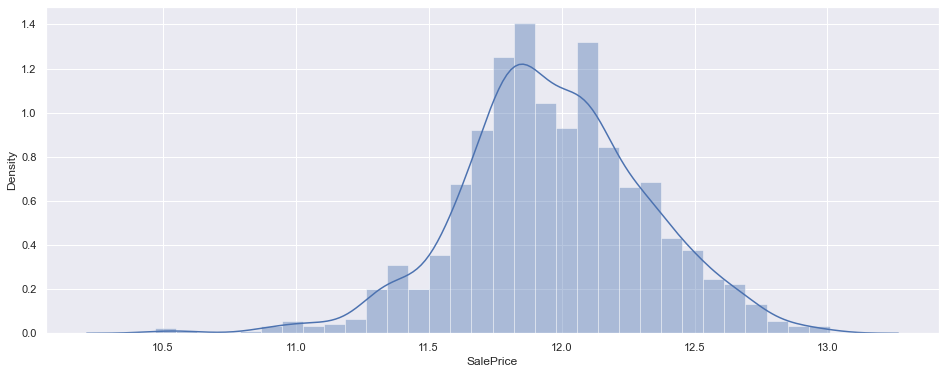

In [96]:

#lets plot the distribution plot of sales price
plt.figure(figsize=(16,6))
sns.distplot(dataNew.SalePrice)
plt.show()

# 11. Train-Test Split

### split the data into two parts 
 - 1. Train data
 - 2. test data

In [97]:
data_train, data_test = train_test_split(dataNew, train_size=0.7,test_size = 0.3, random_state=100)

In [98]:
data_train.shape

(796, 145)

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 1098 to 1021
Columns: 145 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(112)
memory usage: 256.6 KB


In [100]:
data_test.shape

(342, 145)

In [101]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 850 to 509
Columns: 145 entries, MSSubClass to Neighborhood_Veenker
dtypes: category(8), float64(2), int64(23), uint8(112)
memory usage: 111.2 KB


In [102]:
dataNew[['MSSubClass','LotArea','OverallQual','OverallCond',
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]]#  'SalePrice'

,MSSubClass,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,60,8450,7,5,856,856,854,1710,1,2,1,3,0,2,0,61,0
1,20,9600,6,8,1262,1262,0,1262,0,2,0,3,1,2,298,0,0
2,60,11250,7,5,920,920,866,1786,1,2,1,3,1,2,0,42,0
3,70,9550,7,5,756,961,756,1717,1,1,0,3,1,3,0,35,272
4,60,14260,8,5,1145,1145,1053,2198,1,2,1,4,1,3,192,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,7,5,1221,1221,0,1221,1,2,0,2,0,2,0,113,0
1455,60,7917,6,5,953,953,694,1647,0,2,1,3,1,2,0,40,0
1456,20,13175,6,6,1542,2073,0,2073,1,2,0,3,2,2,349,0,0
1457,70,9042,7,9,1152,1188,1152,2340,0,2,0,4,2,1,0,60,0


# 9. Scaling

In [103]:

num_col =['MSSubClass','LotArea','OverallQual','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
data_train[num_col] = scaler.fit_transform(data_train[num_col])
data_test[num_col] = scaler.transform(data_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

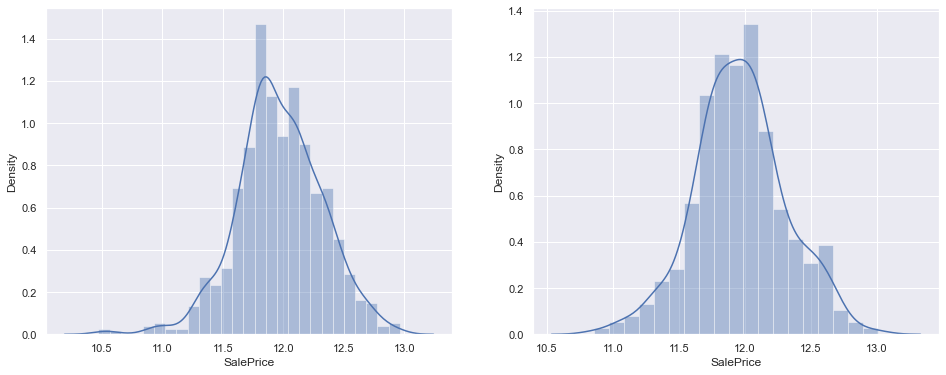

In [104]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(data_train.SalePrice)
plt.subplot(122)
sns.distplot(data_test.SalePrice)


#### Fixing target varibale/ independent and dependent varibales

In [105]:
X_train = data_train
y_train = data_train.pop('SalePrice')

X_test = data_test
y_test = data_test.pop('SalePrice')

# 10. Model Building using mlr and rfe

# Linear Regression
## RFE
- since there are 145 features we will use RFE to get best 50 of them

In [106]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [107]:
y_LR_Pred = lm.predict(X_train)
print(r2_score(y_train, y_LR_Pred))
RSS = np.sum(np.square(y_train-y_LR_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_LR_Pred)
print(MSE)
#RMSE
print(MSE*0.5)

0.9283744788258169
7.1307649095497
0.008958247373806155
0.004479123686903078


Text(0.5, 0, 'Errors')

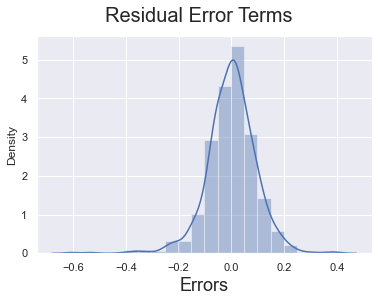

In [108]:
y_LR_Pred = lm.predict(X_train)
res = y_train-y_LR_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

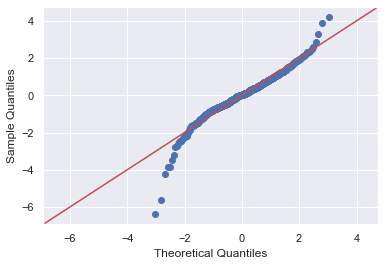

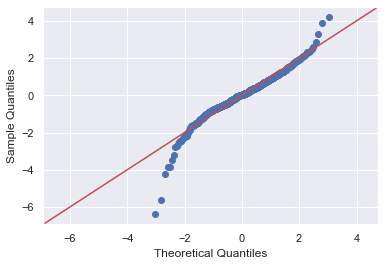

In [109]:
sm.qqplot(res, fit=True,line='45')

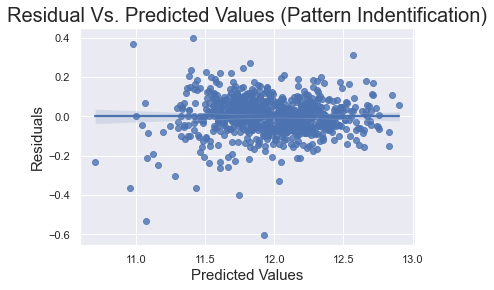

In [110]:
sns.regplot(x=y_LR_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [111]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,OverallCond,True,1
2,BsmtQual,True,1
3,TotalBsmtSF,True,1
4,GrLivArea,True,1
5,GarageCars,True,1
6,MSZoning_FV,True,1
7,MSZoning_RH,True,1
8,MSZoning_RL,True,1
9,MSZoning_RM,True,1


In [112]:
# Assign the 50 columns to X_train_rfe
X_train_rfe = X_train[col]

In [113]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

# Model building and Evaluation

## Ridge Regression Model

In [114]:
# list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [115]:
# the best hyperparameter alpha
ridge_model_cv.best_params_

{'alpha': 0.1}

In [116]:

#fit the data to ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.07478402  0.05883806  0.07201395  0.05755563  0.11450667  0.05020234
  0.46677863  0.34358482  0.42324531  0.33625997  0.07357581 -0.06051903
  0.05880232  0.0872722   0.06902967 -0.06125787 -0.11570159 -0.35250777
  0.04958382 -0.03765889  0.04448214  0.12095139 -0.11128931 -0.20768767
 -0.03765889  0.13655898  0.14104592  0.07615143  0.11392823  0.21946479
  0.22399775  0.24506126  0.26406802  0.23704542  0.18306351  0.16153452
  0.06817394  0.11159339  0.06705218  0.18484179  0.0807444   0.13813061
  0.09582625 -0.04143857 -0.12102697  0.1448201  -0.0620142  -0.07722626
  0.08891705  0.16110112]


In [117]:

# display the mean scores
ridge_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.1,-0.082725,-0.091648,1
2,0.01,-0.082479,-0.091716,2
1,0.001,-0.082459,-0.091749,3
0,0.0001,-0.082457,-0.091754,4
4,0.2,-0.083017,-0.091811,5
5,0.3,-0.083288,-0.091955,6
6,0.4,-0.083528,-0.092063,7
7,0.5,-0.083740,-0.092142,8
8,0.6,-0.083930,-0.092197,9
9,0.7,-0.084104,-0.092239,10


In [118]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)


r2_train:
0.8975299245600213
r2_test:
0.8514089894541355
RSS_train:
10.201531608396618
RSS_test:
6.048088454209437
MSE_train:
0.012815994482910324
MSE_test:
0.01768446916435508


- Even though R2 score test train showing good values but the ridge regression considere so many predictors into count

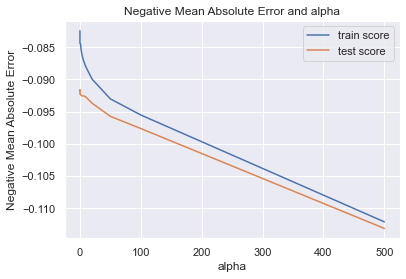

In [119]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [120]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,OverallQual,0.0748
1,OverallCond,0.0588
2,BsmtQual,0.0720
3,TotalBsmtSF,0.0576
4,GrLivArea,0.1145
5,GarageCars,0.0502
6,MSZoning_FV,0.4668
7,MSZoning_RH,0.3436
8,MSZoning_RL,0.4232
9,MSZoning_RM,0.3363


In [121]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,OverallQual,10.873649
7,MSZoning_RH,0.466779
9,MSZoning_RM,0.423245
8,MSZoning_RL,0.343585
10,LandContour_Low,0.336260
33,GarageType_CarPort,0.264068
32,GarageType_BuiltIn,0.245061
34,GarageType_Detchd,0.237045
31,GarageType_Basment,0.223998
30,GarageType_Attchd,0.219465


# Lasso Regression

In [122]:
lm = Lasso(alpha=0.0001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8956623920053393
0.863824346452367


In [123]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
lasso_model_cv.best_params_

{'alpha': 0.0001}

In [125]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [126]:
lasso.coef_

array([ 0.07807839,  0.06040255,  0.07134085,  0.05844101,  0.11361383,
        0.04836898,  0.4269067 ,  0.27176387,  0.38526667,  0.29476017,
        0.06387696, -0.05313888,  0.05722173,  0.        ,  0.05090552,
       -0.04151773, -0.05387689, -0.46477111,  0.04709182, -0.        ,
        0.04264847,  0.04869912, -0.06638889, -0.059416  , -0.        ,
        0.025077  ,  0.09563693,  0.07222834,  0.1109225 ,  0.16339498,
        0.06341169,  0.07241308,  0.09927571,  0.06256957,  0.02260785,
       -0.        ,  0.04476808,  0.06423333,  0.02415765,  0.14039072,
        0.07421615,  0.13217848,  0.09299266, -0.03583905, -0.10676489,
        0.        , -0.06336914, -0.06948946,  0.08667591,  0.14372099])

In [127]:
#printing R@, RSS, MSE values for test and train sets in Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.8956623920053393
r2_test:
0.863824346452367
RSS_train:
10.387456058090795
RSS_test:
5.542747134838601
MSE_train:
0.013049567912174365
MSE_test:
0.01620686296736433


In [128]:
cv_result_lsso = pd.DataFrame(lasso_model_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009869,0.001554,0.000960,0.000049,0.0001,{'alpha': 0.0001},-0.095757,-0.082632,-0.087693,-0.101178,-0.095998,-0.092651,0.006611,1,-0.083654,-0.086000,-0.084356,-0.082544,-0.082796,-0.083870,0.001243
1,0.002425,0.000449,0.000796,0.000070,0.0010,{'alpha': 0.001},-0.097497,-0.084038,-0.084250,-0.102012,-0.101354,-0.093830,0.008058,2,-0.088079,-0.092387,-0.091154,-0.087629,-0.088955,-0.089641,0.001832
2,0.001808,0.000043,0.000736,0.000005,0.0100,{'alpha': 0.01},-0.108290,-0.095591,-0.098558,-0.106147,-0.117442,-0.105206,0.007704,3,-0.102213,-0.104625,-0.106226,-0.102535,-0.101295,-0.103379,0.001793
3,0.001605,0.000121,0.000721,0.000019,0.1000,{'alpha': 0.1},-0.152644,-0.149334,-0.153707,-0.142925,-0.183600,-0.156442,0.014090,4,-0.156878,-0.158148,-0.155640,-0.156208,-0.151847,-0.155744,0.002120
4,0.001436,0.000063,0.000720,0.000021,0.2000,{'alpha': 0.2},-0.219250,-0.221237,-0.221582,-0.210250,-0.249743,-0.224412,0.013319,5,-0.229076,-0.226840,-0.222938,-0.227543,-0.215310,-0.224341,0.004949


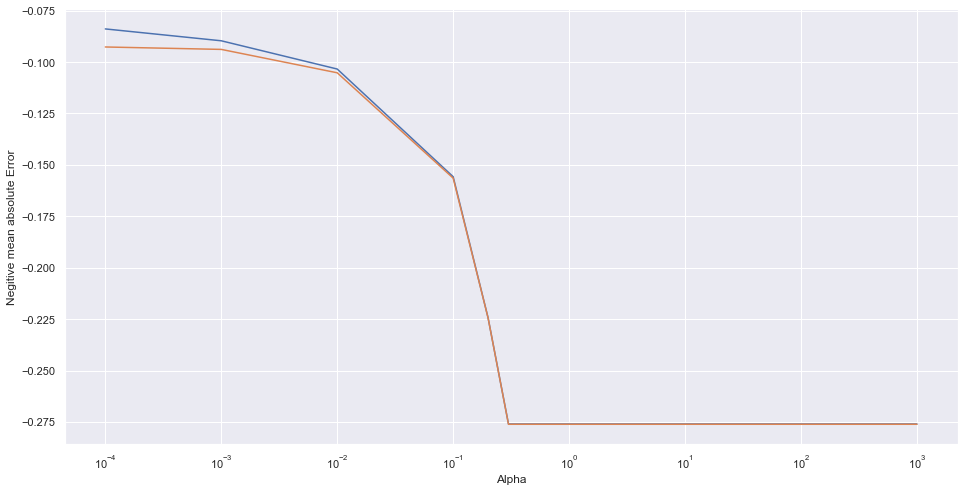

In [129]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [130]:
#checking for the alpha 0.0001
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8956623920053393
0.863824346452367


In [131]:
#getting features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = data_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,11.085883
7,ExterCond,0.426907
9,BsmtCond,0.385267
10,TotalBsmtSF,0.294760
8,BsmtQual,0.271764
30,IsRemodelled,0.163395
50,Condition1_RRNn,0.143721
40,LotConfig_FR2,0.140391
42,LotConfig_Inside,0.132178
5,OverallCond,0.113614


In [132]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,OverallQual,0.0781
1,OverallCond,0.0604
2,BsmtQual,0.0713
3,TotalBsmtSF,0.0584
4,GrLivArea,0.1136
5,GarageCars,0.0484
6,MSZoning_FV,0.4269
7,MSZoning_RH,0.2718
8,MSZoning_RL,0.3853
9,MSZoning_RM,0.2948


In [133]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [134]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

tempLS_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
tempLS_df = tempLS_df.loc[tempLS_df['rfe_support'] == True]
tempLS_df.reset_index(drop=True, inplace=True)

tempLS_df['Coefficient'] = tempLS_df['Features'].apply(find)
tempLS_df = tempLS_df.sort_values(by=['Coefficient'], ascending=False)
tempLS_df = tempLS_df.head(10)
tempLS_df

,Features,rfe_support,rfe_ranking,Coefficient
2,MSZoning_FV,True,1,0.426907
4,MSZoning_RL,True,1,0.385267
5,MSZoning_RM,True,1,0.294760
3,MSZoning_RH,True,1,0.271764
12,Foundation_Stone,True,1,0.163395
14,Neighborhood_Veenker,True,1,0.143721
1,GrLivArea,True,1,0.113614
11,Exterior2nd_VinylSd,True,1,0.095637
0,OverallQual,True,1,0.078078
6,LandContour_Low,True,1,0.063877


In [135]:
tempLS_df["Features"]

2              MSZoning_FV
4              MSZoning_RL
5              MSZoning_RM
3              MSZoning_RH
12        Foundation_Stone
14    Neighborhood_Veenker
1                GrLivArea
11     Exterior2nd_VinylSd
0              OverallQual
6          LandContour_Low
Name: Features, dtype: object

### comparing the results of both Ridge and lasso

In [136]:
#comparing the results of both Ridge and lasso

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.897530,0.895662
1,R2Score Test,0.851409,0.863824
2,RSS Train,10.201532,10.387456
3,RSS Test,6.048088,5.542747
4,MSE Train,0.012816,0.013050
5,MSE Test,0.017684,0.016207


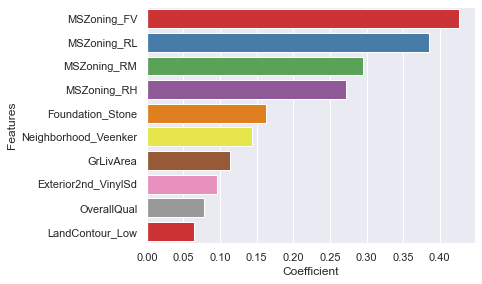

In [137]:

# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = tempLS_df)
plt.show()


## Conclusion :
 
##### significant variables in predicting the price of a house and How well those variables describe the price of a house:
 



- MSZoning_FV
- MSZoning_RL
- MSZoning_RM
- MSZoning_RH
- Foundation_Stone
- Neighborhood_Veenker
- GrLivArea
- Exterior2nd_VinylSd
- OverallQual
- LandContour_Low

###### If they concentrating/investing on these varibles well they can notice significant increase in the sales price.
 
##### The optimal lambda/alpha value in case of Ridge and Lasso is as below:

- Ridge - 0.1
- Lasso - 0.0001

##### The Mean Squared error in case of Ridge and Lasso are:

- Ridge - 0.017684	
- Lasso - 0.016207
  The Mean Squared Error of lasso is slightly lower than that of ridge

Also, since Lasso helps in feature reduction , Lasso has a better edge over Ridge.


Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

# PART 2

Top 5 features are
- MSZoning_FV
- MSZoning_RL
- MSZoning_RM
- MSZoning_RH
- Foundation_Stone
- Neighborhood_Veenker
- GrLivArea
- Exterior2nd_VinylSd
- OverallQual
- LandContour_Low


In [138]:
dataLasso = dataNew
dataLasso = dataLasso.drop(["MSZoning_FV", "MSZoning_RL", "MSZoning_RM", "MSZoning_RH", "Foundation_Stone"], axis=1)


In [139]:
df_train, df_test = train_test_split(dataLasso, train_size=0.7,test_size = 0.3, random_state=100)

In [140]:
num_col =['MSSubClass','LotArea','OverallCond',           
          'TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
         'Fireplaces','GarageCars',
          'WoodDeckSF','OpenPorchSF','EnclosedPorch',
        ]

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [141]:
X_trainLS = df_train
y_trainLS = df_train.pop('SalePrice')

X_testLS = df_test
y_testLS = df_test.pop('SalePrice')

In [142]:
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_trainLS, y_trainLS)

In [143]:
# Assign the columns selected by RFE to cols

col = X_trainLS.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_trainLS.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)

temp1

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,OverallCond,True,1
2,BsmtQual,True,1
3,TotalBsmtSF,True,1
4,1stFlrSF,True,1
5,2ndFlrSF,True,1
6,GarageCars,True,1
7,LotConfig_FR2,True,1
8,Condition1_Norm,True,1
9,Condition1_PosN,True,1


In [144]:
# Assign the 50 columns to X_train_rfe

X_trainLS_rfe = X_trainLS[col]
# Associate the new 50 columns to X_train and X_test for further analysis

X_trainLS = X_trainLS_rfe[X_trainLS_rfe.columns]
X_testLS =  X_testLS[X_trainLS.columns]

In [145]:
# Lasso Regression:

lm = Lasso(alpha=0.0001)
lm.fit(X_trainLS,y_trainLS)

y_train_predLS = lm.predict(X_trainLS)
print(r2_score(y_true=y_trainLS,y_pred=y_train_predLS))

y_test_predLS  = lm.predict(X_testLS)
print(r2_score(y_true=y_testLS,y_pred=y_test_predLS))


0.8860519388541883
0.8641470612514637


In [146]:
#printing R2, RSS, MSE results
r2_train_lr = r2_score(y_trainLS ,y_train_predLS )
print(r2_train_lr)


r2_test_lr = r2_score(y_testLS, y_test_predLS)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_trainLS-y_train_predLS))
print(rss1_lr)


rss2_lr = np.sum(np.square(y_testLS - y_test_predLS))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_trainLS,y_train_predLS)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_testLS , y_test_predLS)
print(mse_test_lr)

0.8860519388541883
0.8641470612514637
11.344236280721823
5.529611699234192
0.014251553116484702
0.01616845526091869


In [147]:
model_param = list(lm.coef_)
model_param.insert(0,lm.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
0,MSSubClass,11.084888
50,BldgType_TwnhsE,0.161757
41,Condition1_PosA,0.147945
39,Condition1_Feedr,0.141673
27,EnclosedPorch,0.129787
25,WoodDeckSF,0.123000
43,Condition1_RRAe,0.109016
6,ExterQual,0.106236
30,IsRemodelled,0.098191
26,OpenPorchSF,0.092688
